<a href="https://colab.research.google.com/github/SamarthK1/COMP-6630-Machine-Learning/blob/main/COMP6630_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: Neural Networks
---
Samarth Kumar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load the data

In [2]:
# Load dataset using pandas
X_train = pd.read_csv("X_train.csv", header=None, delimiter=r"\s+").astype(float).values
Y_train = pd.read_csv("Y_train.csv", header=None, delimiter=r"\s+").astype(float).values
X_test = pd.read_csv("X_test.csv", header=None, delimiter=r"\s+").astype(float).values
Y_test = pd.read_csv("Y_test.csv", header=None, delimiter=r"\s+").astype(float).values

### Define the Activation functions
Sigmoid, ReLu, and Tanh

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

In [4]:
activation_functions = {
    "sigmoid": (sigmoid, sigmoid_derivative),
    "relu": (relu, relu_derivative),
    "tanh": (tanh, tanh_derivative)
}

### Define the Forward Pass and Backpropagation

In [5]:
# Forward pass
def forward_pass(X, W1, b1, W2, b2, activation_func):
    Z1 = np.dot(X, W1) + b1
    A1 = activation_func(Z1)
    Z2 = np.dot(A1, W2) + b2
    return Z1, A1, Z2

# Backward propagation
def backpropagation(X, Y, Z1, A1, Z2, W2, activation_deriv):
    dL_dY_pred = 2 * (Z2 - Y) / Y.shape[0]
    dL_dW2 = np.dot(A1.T, dL_dY_pred)
    dL_db2 = np.sum(dL_dY_pred, axis=0, keepdims=True)
    dL_dA1 = np.dot(dL_dY_pred, W2.T)
    dL_dZ1 = dL_dA1 * activation_deriv(A1)
    dL_dW1 = np.dot(X.T, dL_dZ1)
    dL_db1 = np.sum(dL_dZ1, axis=0, keepdims=True)

    # Clip gradients to avoid exploding gradients
    dL_dW1 = np.clip(dL_dW1, -5, 5)
    dL_db1 = np.clip(dL_db1, -5, 5)
    dL_dW2 = np.clip(dL_dW2, -5, 5)
    dL_db2 = np.clip(dL_db2, -5, 5)

    return dL_dW1, dL_db1, dL_dW2, dL_db2

Helper Functions

In [6]:
# Initialize values
def initialize(hidden_size):
    input_size = X_train.shape[1]
    output_size = 1
    W1 = np.random.randn(input_size, hidden_size) * 0.01
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * 0.01
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

In [7]:
# Plotting Loss
def plot_loss(losses_dict, learning_rate, hidden_size):
    plt.figure(figsize=(8, 6))
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.title(f"Loss Curves for Different Activations (LR={learning_rate}, Neurons={hidden_size})")

    for activation_name, (losses_train, losses_val) in losses_dict.items():
        plt.plot(losses_train, label=f'{activation_name} Train Loss')
        plt.plot(losses_val, label=f'{activation_name} Val Loss', linestyle='dashed')

    plt.legend()
    plt.show()

### Training the Neural Network

In [8]:
# Training function
def train_network(X_train, Y_train, X_val, Y_val, hidden_size, learning_rate, num_epochs):

    losses_dict = {}

    for activation_name, (activation_func, activation_deriv) in activation_functions.items():
        print(f"Training with {activation_name} activation function")

        W1, b1, W2, b2 = initialize(hidden_size)

        losses_train = []
        losses_val = []

        for epoch in range(num_epochs):
            Z1, A1, Z2 = forward_pass(
                X_train, W1, b1, W2, b2, activation_func
            )
            loss_train = np.mean((Y_train - Z2) ** 2)
            losses_train.append(loss_train)

            _, _, Z2_val = forward_pass(
                X_val, W1, b1, W2, b2, activation_func
            )
            loss_val = np.mean((Y_val - Z2_val) ** 2)
            losses_val.append(loss_val)

            dL_dW1, dL_db1, dL_dW2, dL_db2 = backpropagation(
                X_train, Y_train, Z1, A1, Z2, W2, activation_deriv
            )

            W1 -= learning_rate * dL_dW1
            b1 -= learning_rate * dL_db1
            W2 -= learning_rate * dL_dW2
            b2 -= learning_rate * dL_db2

            if epoch % 100 == 0 or epoch == num_epochs - 1:
                print(f"    Epoch {epoch}, Train Loss: {loss_train:.4f}, Val Loss: {loss_val:.4f}")

        losses_dict[activation_name] = (losses_train, losses_val)

    plot_loss(losses_dict, learning_rate, hidden_size)

### Testing our neural network

#### Constant Hidden Size, Learning Rates 0.001, 0.01, 0.1, 1.0

hidden_size = 10, learning_rate = 0.001

Training with sigmoid activation function
    Epoch 0, Train Loss: 5716.8816, Val Loss: 5640.7459
    Epoch 100, Train Loss: 5592.3374, Val Loss: 5494.0940
    Epoch 200, Train Loss: 5337.4978, Val Loss: 5227.9949
    Epoch 300, Train Loss: 5030.7645, Val Loss: 4931.9722
    Epoch 400, Train Loss: 4719.5108, Val Loss: 4640.7305
    Epoch 500, Train Loss: 4423.4154, Val Loss: 4365.1510
    Epoch 600, Train Loss: 4149.5717, Val Loss: 4110.7382
    Epoch 700, Train Loss: 3899.2845, Val Loss: 3879.4003
    Epoch 800, Train Loss: 3671.9860, Val Loss: 3671.0072
    Epoch 900, Train Loss: 3469.5357, Val Loss: 3487.3093
    Epoch 999, Train Loss: 3289.4885, Val Loss: 3325.2845
Training with relu activation function
    Epoch 0, Train Loss: 5716.8361, Val Loss: 5640.6586
    Epoch 100, Train Loss: 5522.6592, Val Loss: 5449.6063
    Epoch 200, Train Loss: 4756.3977, Val Loss: 4706.2003
    Epoch 300, Train Loss: 3536.9381, Val Loss: 3528.2420
    Epoch 400, Train Loss: 2114.4031, Val Loss: 2156.

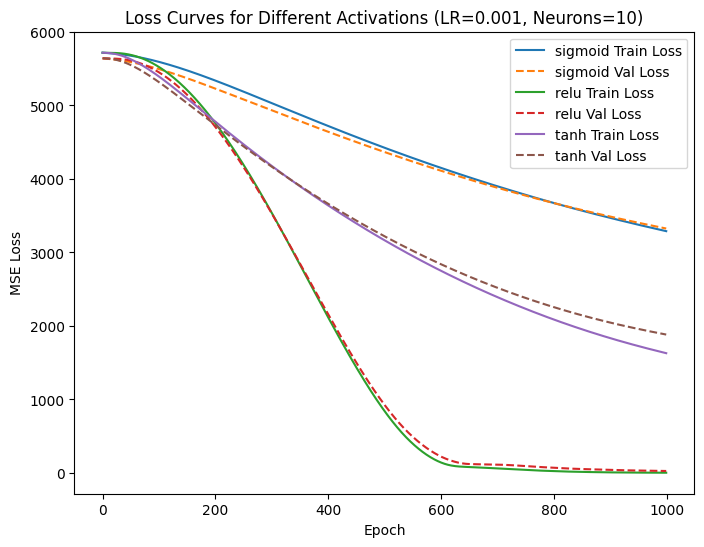

In [9]:
# from sklearn.model_selection import train_test_split
# Split dataset into training and validation sets
# X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

hidden_size = 10 # Adjust as needed
learning_rate = 0.001  # Adjust as needed
num_epochs = 1000  # Adjust as needed

train_network(X_train, Y_train, X_test, Y_test, hidden_size, learning_rate, num_epochs)

hidden_size = 10, learning_rate = 0.01

Training with sigmoid activation function
    Epoch 0, Train Loss: 5716.4654, Val Loss: 5640.1214
    Epoch 100, Train Loss: 3286.8341, Val Loss: 3322.8991
    Epoch 200, Train Loss: 2161.0403, Val Loss: 2368.9830
    Epoch 300, Train Loss: 1716.5070, Val Loss: 2009.1176
    Epoch 400, Train Loss: 1456.6967, Val Loss: 1761.0613
    Epoch 500, Train Loss: 1254.6599, Val Loss: 1573.5137
    Epoch 600, Train Loss: 1076.9452, Val Loss: 1408.8324
    Epoch 700, Train Loss: 918.1563, Val Loss: 1260.1338
    Epoch 800, Train Loss: 778.1383, Val Loss: 1126.7024
    Epoch 900, Train Loss: 655.4878, Val Loss: 1005.8870
    Epoch 999, Train Loss: 549.8882, Val Loss: 896.4643
Training with relu activation function
    Epoch 0, Train Loss: 5716.8333, Val Loss: 5640.6576
    Epoch 100, Train Loss: 30.7013, Val Loss: 74.2572
    Epoch 200, Train Loss: 25.9760, Val Loss: 66.3142
    Epoch 300, Train Loss: 24.6332, Val Loss: 61.6692
    Epoch 400, Train Loss: 23.7714, Val Loss: 58.6212
    Epoch 500, T

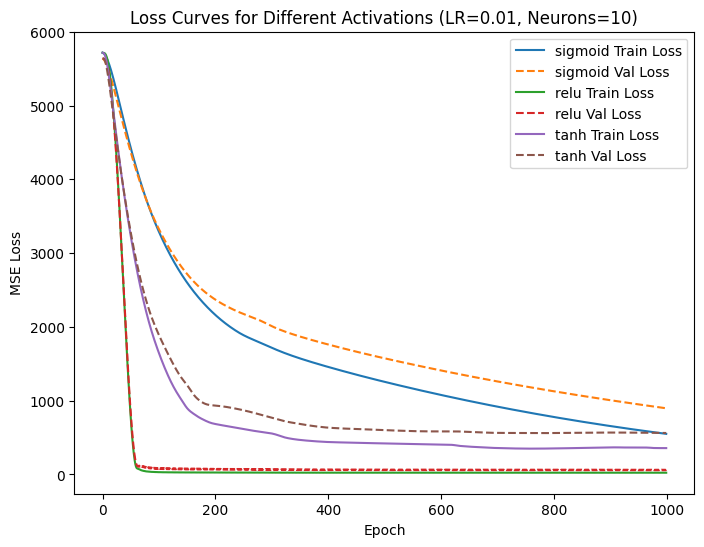

In [10]:
hidden_size = 10
learning_rate = 0.01
num_epochs = 1000
train_network(X_train, Y_train, X_test, Y_test, hidden_size, learning_rate, num_epochs)

learning_rate = 0.1

Training with sigmoid activation function
    Epoch 0, Train Loss: 5717.0538, Val Loss: 5640.9999
    Epoch 100, Train Loss: 899.7734, Val Loss: 1314.9546
    Epoch 200, Train Loss: 656.4832, Val Loss: 1051.1777
    Epoch 300, Train Loss: 610.8550, Val Loss: 997.7029
    Epoch 400, Train Loss: 603.2560, Val Loss: 988.4960
    Epoch 500, Train Loss: 602.3511, Val Loss: 987.3701
    Epoch 600, Train Loss: 602.3111, Val Loss: 987.3124
    Epoch 700, Train Loss: 602.3132, Val Loss: 987.3122
    Epoch 800, Train Loss: 602.3138, Val Loss: 987.3121
    Epoch 900, Train Loss: 602.3139, Val Loss: 987.3121
    Epoch 999, Train Loss: 612.7004, Val Loss: 956.3726
Training with relu activation function
    Epoch 0, Train Loss: 5716.8322, Val Loss: 5640.6450
    Epoch 100, Train Loss: 327.3560, Val Loss: 256.0690
    Epoch 200, Train Loss: 327.3560, Val Loss: 256.0690
    Epoch 300, Train Loss: 327.3560, Val Loss: 256.0690
    Epoch 400, Train Loss: 327.3560, Val Loss: 256.0690
    Epoch 500, Train 

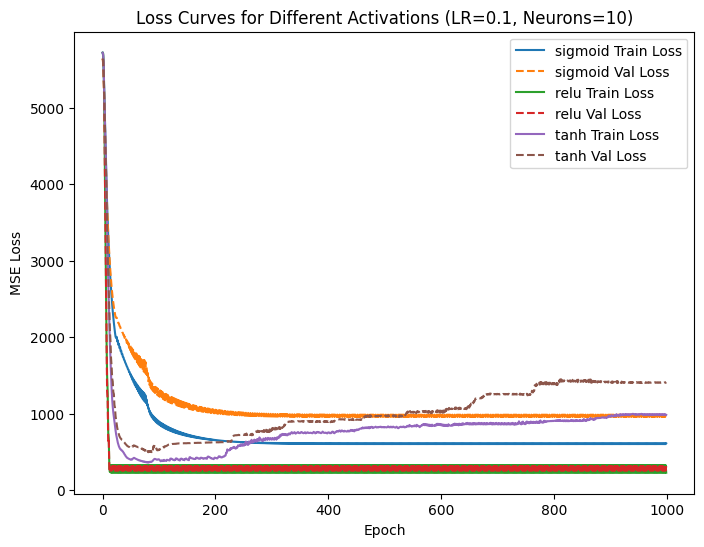

In [11]:
hidden_size = 10
learning_rate = 0.1
num_epochs = 1000
train_network(X_train, Y_train, X_test, Y_test, hidden_size, learning_rate, num_epochs)

learning_rate = 1.0

Training with sigmoid activation function
    Epoch 0, Train Loss: 5717.2277, Val Loss: 5641.2684
    Epoch 100, Train Loss: 1966.9982, Val Loss: 2343.4046
    Epoch 200, Train Loss: 1968.5481, Val Loss: 2327.2145
    Epoch 300, Train Loss: 1958.9646, Val Loss: 2335.4629
    Epoch 400, Train Loss: 1957.0244, Val Loss: 2337.6314
    Epoch 500, Train Loss: 1929.8643, Val Loss: 2285.0582
    Epoch 600, Train Loss: 1919.3940, Val Loss: 2231.2733
    Epoch 700, Train Loss: 1911.1031, Val Loss: 2230.0379
    Epoch 800, Train Loss: 1904.4735, Val Loss: 2209.5855
    Epoch 900, Train Loss: 1901.2199, Val Loss: 2204.1804
    Epoch 999, Train Loss: 2494.9734, Val Loss: 2675.5693
Training with relu activation function
    Epoch 0, Train Loss: 5716.7812, Val Loss: 5640.6055
    Epoch 100, Train Loss: 110353.0336, Val Loss: 120595.4906
    Epoch 200, Train Loss: 110353.0336, Val Loss: 120595.4906
    Epoch 300, Train Loss: 110353.0336, Val Loss: 120595.4906
    Epoch 400, Train Loss: 110353.0336, V

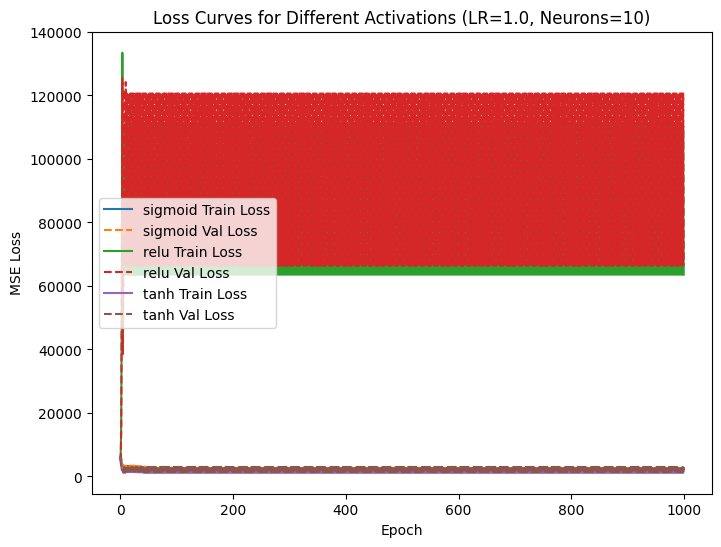

In [12]:
hidden_size = 10
learning_rate = 1.0
num_epochs = 1000
train_network(X_train, Y_train, X_test, Y_test, hidden_size, learning_rate, num_epochs)

#### Constant learning rate, hidden sizes 1, 5, 10, 20

hidden_size = 1

Training with sigmoid activation function
    Epoch 0, Train Loss: 5716.8846, Val Loss: 5640.7461
    Epoch 100, Train Loss: 5696.9636, Val Loss: 5615.1765
    Epoch 200, Train Loss: 5662.7963, Val Loss: 5576.0182
    Epoch 300, Train Loss: 5622.2154, Val Loss: 5532.0133
    Epoch 400, Train Loss: 5580.1120, Val Loss: 5487.1652
    Epoch 500, Train Loss: 5538.6805, Val Loss: 5442.9543
    Epoch 600, Train Loss: 5498.6714, Val Loss: 5400.0059
    Epoch 700, Train Loss: 5460.3061, Val Loss: 5358.5713
    Epoch 800, Train Loss: 5423.7513, Val Loss: 5319.1047
    Epoch 900, Train Loss: 5389.0793, Val Loss: 5282.3492
    Epoch 999, Train Loss: 5356.0907, Val Loss: 5248.0112
Training with relu activation function
    Epoch 0, Train Loss: 5716.7868, Val Loss: 5640.6111
    Epoch 100, Train Loss: 5684.0358, Val Loss: 5605.1346
    Epoch 200, Train Loss: 5595.2164, Val Loss: 5516.5764
    Epoch 300, Train Loss: 5452.6842, Val Loss: 5377.0870
    Epoch 400, Train Loss: 5261.6626, Val Loss: 5191.

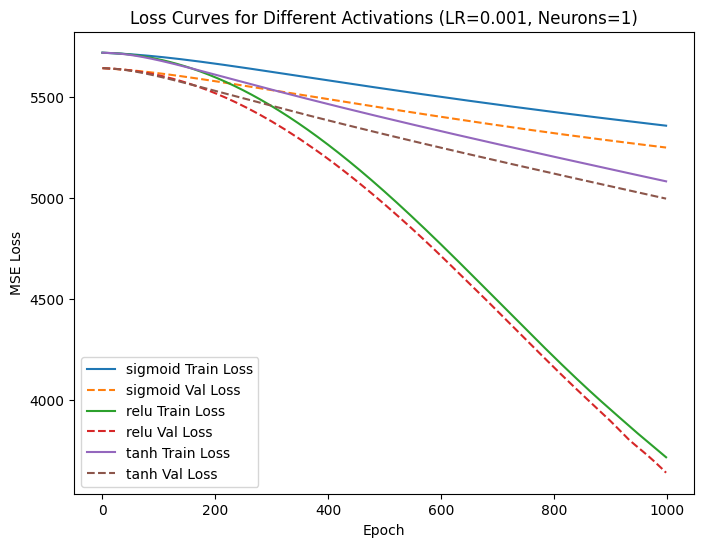

In [13]:
hidden_size = 1
learning_rate = 0.001
num_epochs = 1000
train_network(X_train, Y_train, X_test, Y_test, hidden_size, learning_rate, num_epochs)

hidden_size = 5

Training with sigmoid activation function
    Epoch 0, Train Loss: 5716.9258, Val Loss: 5640.8095
    Epoch 100, Train Loss: 5648.7251, Val Loss: 5559.4857
    Epoch 200, Train Loss: 5511.4863, Val Loss: 5413.5956
    Epoch 300, Train Loss: 5344.5115, Val Loss: 5246.8132
    Epoch 400, Train Loss: 5173.2632, Val Loss: 5080.2208
    Epoch 500, Train Loss: 5007.5762, Val Loss: 4920.9518
    Epoch 600, Train Loss: 4849.0298, Val Loss: 4769.5618
    Epoch 700, Train Loss: 4697.2346, Val Loss: 4625.4823
    Epoch 800, Train Loss: 4551.4819, Val Loss: 4487.8723
    Epoch 900, Train Loss: 4411.7188, Val Loss: 4356.2348
    Epoch 999, Train Loss: 4279.9919, Val Loss: 4232.7449
Training with relu activation function
    Epoch 0, Train Loss: 5716.8000, Val Loss: 5640.6208
    Epoch 100, Train Loss: 5573.5559, Val Loss: 5498.2904
    Epoch 200, Train Loss: 5073.8005, Val Loss: 5010.7602
    Epoch 300, Train Loss: 4327.4977, Val Loss: 4299.4026
    Epoch 400, Train Loss: 3518.3415, Val Loss: 3560.

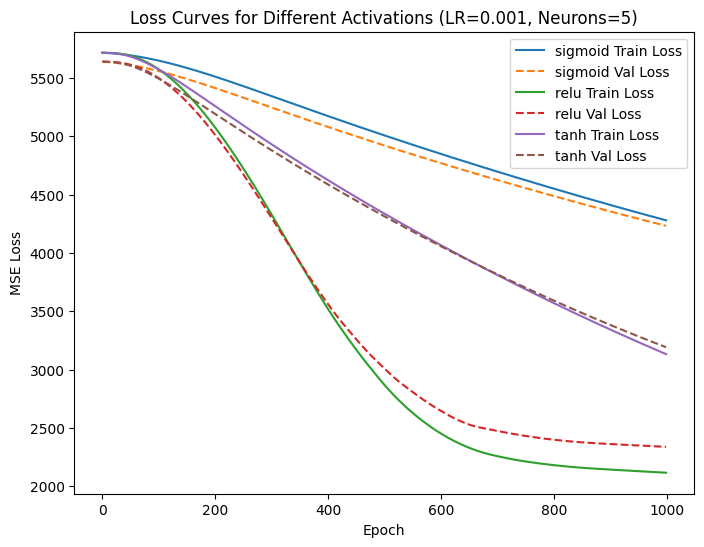

In [14]:
hidden_size = 5
learning_rate = 0.001
num_epochs = 1000
train_network(X_train, Y_train, X_test, Y_test, hidden_size, learning_rate, num_epochs)

hidden_size = 10

Training with sigmoid activation function
    Epoch 0, Train Loss: 5716.9560, Val Loss: 5640.8671
    Epoch 100, Train Loss: 5592.1423, Val Loss: 5494.2698
    Epoch 200, Train Loss: 5337.2766, Val Loss: 5228.0821
    Epoch 300, Train Loss: 5030.6958, Val Loss: 4932.0131
    Epoch 400, Train Loss: 4719.6064, Val Loss: 4640.8552
    Epoch 500, Train Loss: 4423.6352, Val Loss: 4365.3665
    Epoch 600, Train Loss: 4149.8745, Val Loss: 4111.0177
    Epoch 700, Train Loss: 3899.6379, Val Loss: 3879.7198
    Epoch 800, Train Loss: 3672.3759, Val Loss: 3671.3577
    Epoch 900, Train Loss: 3469.9492, Val Loss: 3487.6805
    Epoch 999, Train Loss: 3289.8946, Val Loss: 3325.6477
Training with relu activation function
    Epoch 0, Train Loss: 5716.8148, Val Loss: 5640.6384
    Epoch 100, Train Loss: 5526.5062, Val Loss: 5453.1235
    Epoch 200, Train Loss: 4805.2252, Val Loss: 4754.3475
    Epoch 300, Train Loss: 3666.1110, Val Loss: 3649.2611
    Epoch 400, Train Loss: 2349.3500, Val Loss: 2349.

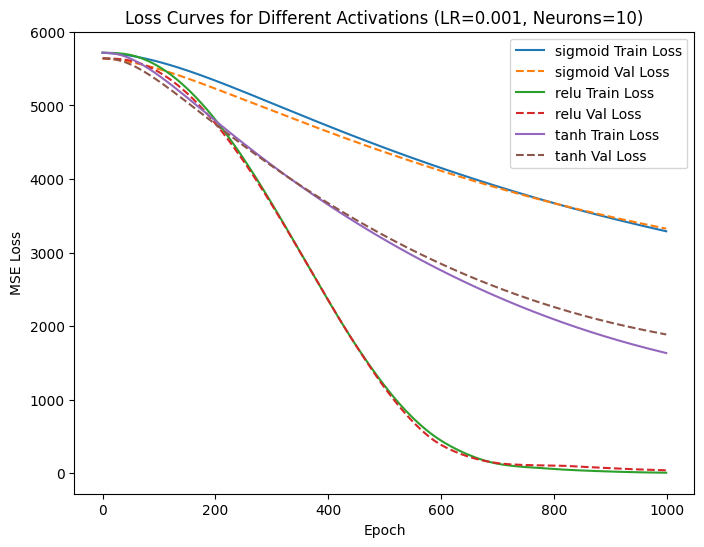

In [15]:
hidden_size = 10
learning_rate = 0.001
num_epochs = 1000
train_network(X_train, Y_train, X_test, Y_test, hidden_size, learning_rate, num_epochs)

# Extra

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load dataset using pandas
X = pd.read_csv("X_train.csv", header=None, delimiter=r"\s+").astype(float).values
Y = pd.read_csv("Y_train.csv", header=None, delimiter=r"\s+").astype(float).values
X_test = pd.read_csv("X_test.csv", header=None, delimiter=r"\s+").astype(float).values
Y_test = pd.read_csv("Y_test.csv", header=None, delimiter=r"\s+").astype(float).values

# Split dataset into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# Activation Functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

activation_functions = {
    "sigmoid": (sigmoid, sigmoid_derivative),
    "relu": (relu, relu_derivative),
    "tanh": (tanh, tanh_derivative)
}

# Forward pass
def forward_pass(X, W1, b1, W2, b2, activation_func):
    Z1 = np.dot(X, W1) + b1
    A1 = activation_func(Z1)
    Z2 = np.dot(A1, W2) + b2
    return Z1, A1, Z2

# Backward propagation
def backward_pass(X, Y, Z1, A1, Z2, W2, activation_deriv):
    dL_dY_pred = 2 * (Z2 - Y) / Y.shape[0]
    dL_dW2 = np.dot(A1.T, dL_dY_pred)
    dL_db2 = np.sum(dL_dY_pred, axis=0, keepdims=True)
    dL_dA1 = np.dot(dL_dY_pred, W2.T)
    dL_dZ1 = dL_dA1 * activation_deriv(A1)
    dL_dW1 = np.dot(X.T, dL_dZ1)
    dL_db1 = np.sum(dL_dZ1, axis=0, keepdims=True)

    # Clip gradients to avoid exploding gradients
    dL_dW1 = np.clip(dL_dW1, -3, 3)
    dL_db1 = np.clip(dL_db1, -3, 3)
    dL_dW2 = np.clip(dL_dW2, -3, 3)
    dL_db2 = np.clip(dL_db2, -3, 3)
    return dL_dW1, dL_db1, dL_dW2, dL_db2

# Training function
def train_network(X_train, Y_train, X_val, Y_val, hidden_sizes, learning_rate, num_epochs, activation_name):
    activation_func, activation_deriv = activation_functions[activation_name]
    final_losses = {}

    for hidden_size in hidden_sizes:
        print(f"Training with {hidden_size} hidden neurons using {activation_name} activation")

        W1 = np.random.randn(X_train.shape[1], hidden_size) * 0.01
        b1 = np.zeros((1, hidden_size))
        W2 = np.random.randn(hidden_size, 1) * 0.01
        b2 = np.zeros((1, 1))

        losses_train = []

        for epoch in range(num_epochs):
            Z1, A1, Z2 = forward_pass(X_train, W1, b1, W2, b2, activation_func)
            loss_train = np.mean((Y_train - Z2) ** 2)
            losses_train.append(loss_train)

            dL_dW1, dL_db1, dL_dW2, dL_db2 = backward_pass(X_train, Y_train, Z1, A1, Z2, W2, activation_deriv)

            W1 -= learning_rate * dL_dW1
            b1 -= learning_rate * dL_db1
            W2 -= learning_rate * dL_dW2
            b2 -= learning_rate * dL_db2

            if epoch % 100 == 0:
                print(f"    Epoch {epoch}, Train Loss: {loss_train:.4f}")

        final_losses[hidden_size] = loss_train

        # Plot True vs. Predicted Labels
        Y_pred = np.dot(activation_func(np.dot(X_test, W1) + b1), W2) + b2
        plt.figure(figsize=(8, 6))
        plt.scatter(Y_test, Y_pred, alpha=0.6, label=f"{activation_name}")
        plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r', lw=2)
        plt.xlabel("True Values")
        plt.ylabel("Predicted Values")
        plt.title(f"True vs. Predicted for {activation_name} (Neurons={hidden_size})")
        plt.legend()
        plt.show()

    return final_losses

Sigmoid

Training with 1 hidden neurons using sigmoid activation
    Epoch 0, Train Loss: 5702.5165
    Epoch 100, Train Loss: 5487.4543
    Epoch 200, Train Loss: 5284.3248
    Epoch 300, Train Loss: 5103.9357
    Epoch 400, Train Loss: 4929.7598
    Epoch 500, Train Loss: 4760.0775
    Epoch 600, Train Loss: 4594.7316
    Epoch 700, Train Loss: 4433.6714
    Epoch 800, Train Loss: 4276.8624
    Epoch 900, Train Loss: 4124.2686


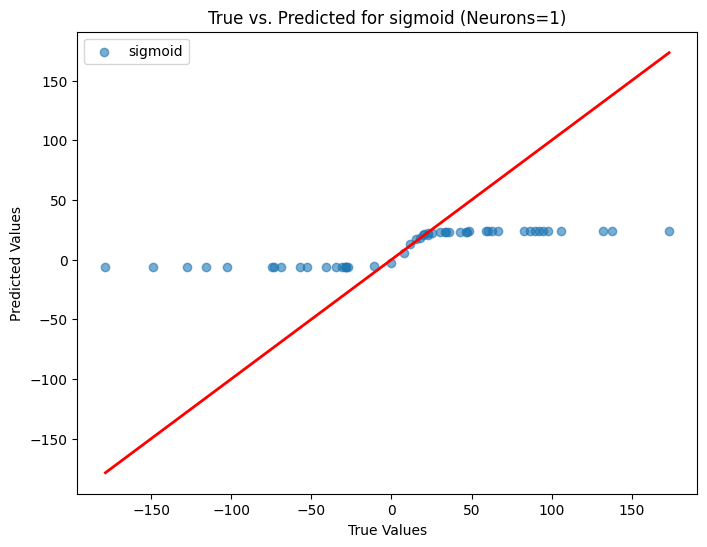

Training with 2 hidden neurons using sigmoid activation
    Epoch 0, Train Loss: 5702.6316
    Epoch 100, Train Loss: 5319.2033
    Epoch 200, Train Loss: 4942.5589
    Epoch 300, Train Loss: 4602.6269
    Epoch 400, Train Loss: 4282.8219
    Epoch 500, Train Loss: 3980.2213
    Epoch 600, Train Loss: 3694.3753
    Epoch 700, Train Loss: 3424.9698
    Epoch 800, Train Loss: 3171.6525
    Epoch 900, Train Loss: 2933.9601


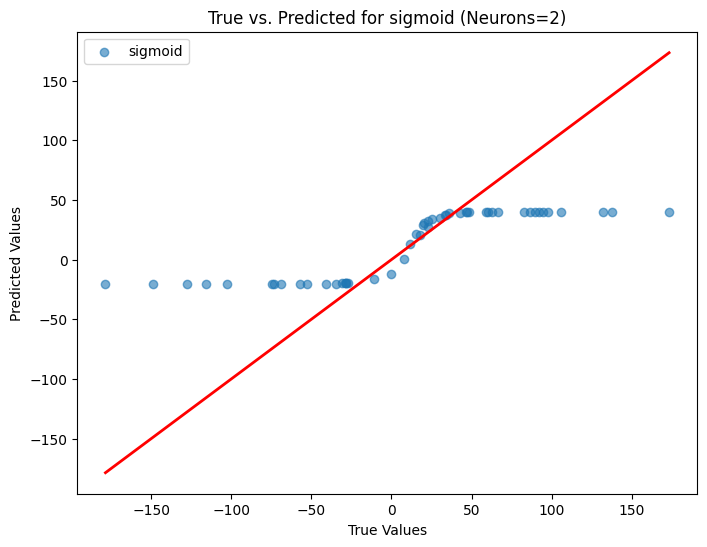

Training with 3 hidden neurons using sigmoid activation
    Epoch 0, Train Loss: 5702.6346
    Epoch 100, Train Loss: 5156.7718
    Epoch 200, Train Loss: 4616.1567
    Epoch 300, Train Loss: 4143.2560
    Epoch 400, Train Loss: 3715.7879
    Epoch 500, Train Loss: 3328.5818
    Epoch 600, Train Loss: 2980.0943
    Epoch 700, Train Loss: 2668.5168
    Epoch 800, Train Loss: 2389.5170
    Epoch 900, Train Loss: 2123.8495


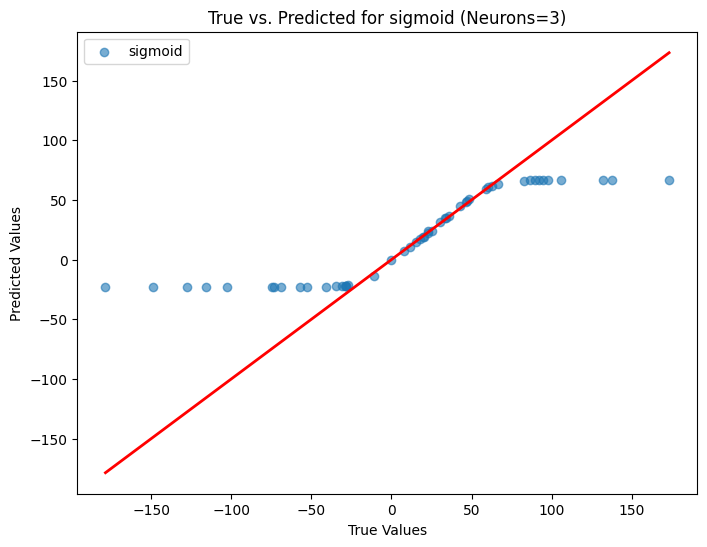

Training with 4 hidden neurons using sigmoid activation
    Epoch 0, Train Loss: 5702.4780
    Epoch 100, Train Loss: 4998.8071
    Epoch 200, Train Loss: 4309.7381
    Epoch 300, Train Loss: 3736.6858
    Epoch 400, Train Loss: 3246.0973
    Epoch 500, Train Loss: 2829.5558
    Epoch 600, Train Loss: 2477.0585
    Epoch 700, Train Loss: 2160.0761
    Epoch 800, Train Loss: 1883.4625
    Epoch 900, Train Loss: 1642.4594


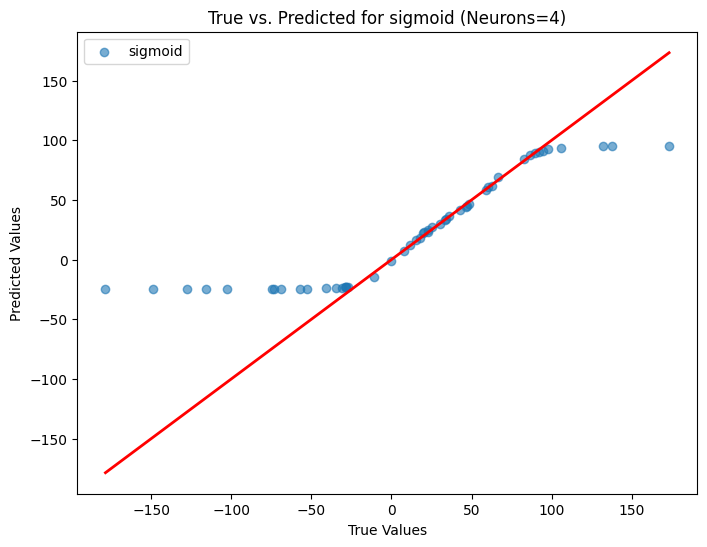

Training with 5 hidden neurons using sigmoid activation
    Epoch 0, Train Loss: 5702.6958
    Epoch 100, Train Loss: 4848.4969
    Epoch 200, Train Loss: 4029.6768
    Epoch 300, Train Loss: 3388.4021
    Epoch 400, Train Loss: 2875.6653
    Epoch 500, Train Loss: 2467.8857
    Epoch 600, Train Loss: 2120.2723
    Epoch 700, Train Loss: 1819.7979
    Epoch 800, Train Loss: 1572.3679
    Epoch 900, Train Loss: 1370.4641


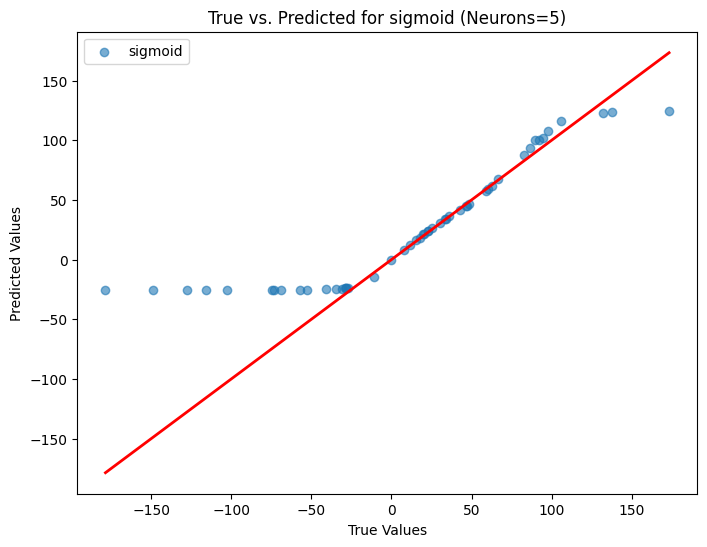

Training with 6 hidden neurons using sigmoid activation
    Epoch 0, Train Loss: 5702.6980
    Epoch 100, Train Loss: 4699.9700
    Epoch 200, Train Loss: 3773.0956
    Epoch 300, Train Loss: 3094.2391
    Epoch 400, Train Loss: 2589.0242
    Epoch 500, Train Loss: 2200.5237
    Epoch 600, Train Loss: 1862.9838
    Epoch 700, Train Loss: 1602.3049
    Epoch 800, Train Loss: 1407.9278
    Epoch 900, Train Loss: 1270.5089


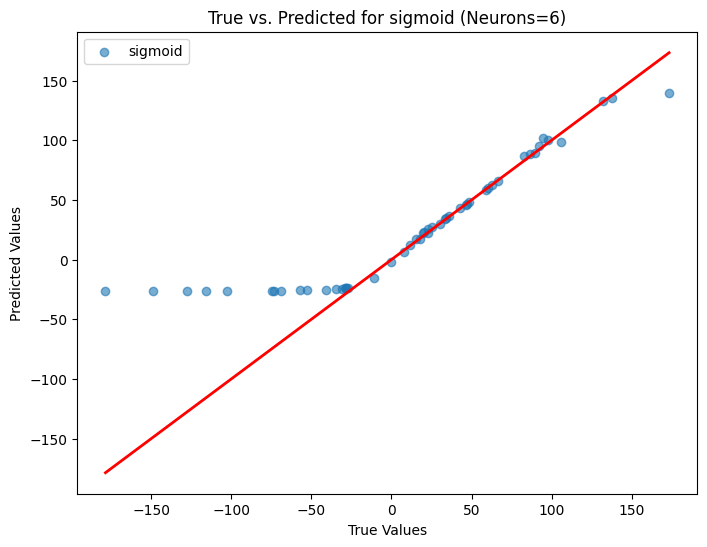

Training with 7 hidden neurons using sigmoid activation
    Epoch 0, Train Loss: 5702.5844
    Epoch 100, Train Loss: 4556.2337
    Epoch 200, Train Loss: 3541.0289
    Epoch 300, Train Loss: 2850.3159
    Epoch 400, Train Loss: 2367.0543
    Epoch 500, Train Loss: 1988.4241
    Epoch 600, Train Loss: 1695.0582
    Epoch 700, Train Loss: 1493.0495
    Epoch 800, Train Loss: 1358.3074
    Epoch 900, Train Loss: 1241.5088


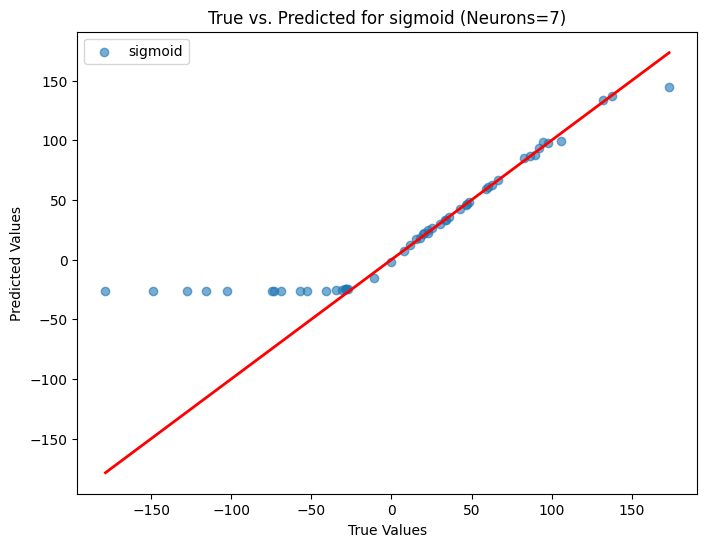

Training with 8 hidden neurons using sigmoid activation
    Epoch 0, Train Loss: 5702.6051
    Epoch 100, Train Loss: 4418.2345
    Epoch 200, Train Loss: 3334.0563
    Epoch 300, Train Loss: 2650.5280
    Epoch 400, Train Loss: 2191.7709
    Epoch 500, Train Loss: 1839.4221
    Epoch 600, Train Loss: 1603.1924
    Epoch 700, Train Loss: 1459.0777
    Epoch 800, Train Loss: 1336.3646
    Epoch 900, Train Loss: 1224.0215


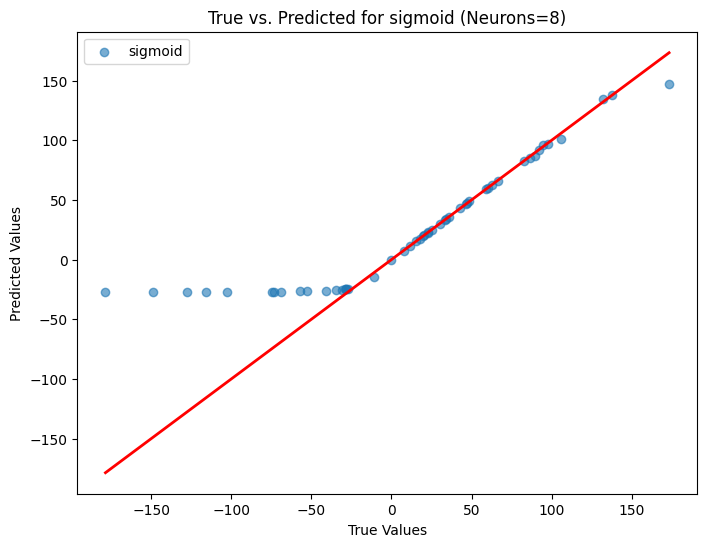

Training with 9 hidden neurons using sigmoid activation
    Epoch 0, Train Loss: 5702.8561
    Epoch 100, Train Loss: 4286.6434
    Epoch 200, Train Loss: 3151.3156
    Epoch 300, Train Loss: 2486.6894
    Epoch 400, Train Loss: 2055.4378
    Epoch 500, Train Loss: 1745.6378
    Epoch 600, Train Loss: 1571.7097
    Epoch 700, Train Loss: 1440.7966
    Epoch 800, Train Loss: 1322.0466
    Epoch 900, Train Loss: 1211.7880


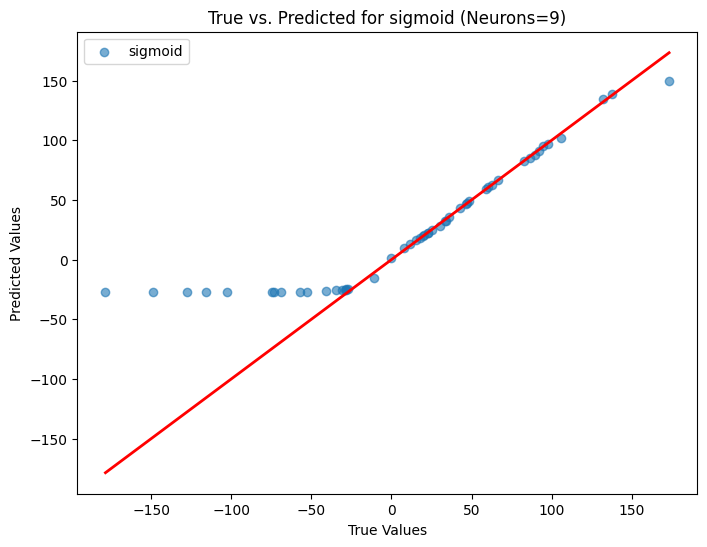

Training with 10 hidden neurons using sigmoid activation
    Epoch 0, Train Loss: 5702.6831
    Epoch 100, Train Loss: 4158.1045
    Epoch 200, Train Loss: 2988.4823
    Epoch 300, Train Loss: 2349.6558
    Epoch 400, Train Loss: 1951.1918
    Epoch 500, Train Loss: 1700.8352
    Epoch 600, Train Loss: 1554.9008
    Epoch 700, Train Loss: 1428.0830
    Epoch 800, Train Loss: 1310.7818
    Epoch 900, Train Loss: 1201.5561


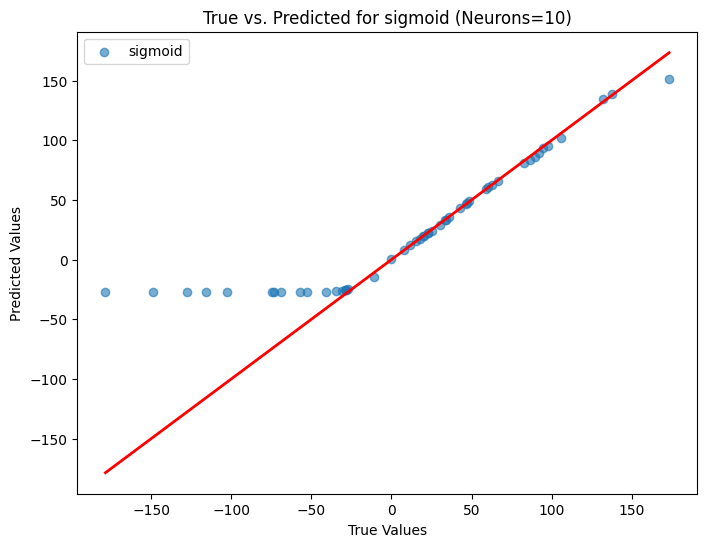

Final Losses:
Hidden Neurons: 1, Final Loss: 3977.3123
Hidden Neurons: 2, Final Loss: 2713.3707
Hidden Neurons: 3, Final Loss: 1891.1175
Hidden Neurons: 4, Final Loss: 1432.5587
Hidden Neurons: 5, Final Loss: 1211.6632
Hidden Neurons: 6, Final Loss: 1157.6461
Hidden Neurons: 7, Final Loss: 1135.9565
Hidden Neurons: 8, Final Loss: 1120.8625
Hidden Neurons: 9, Final Loss: 1110.0479
Hidden Neurons: 10, Final Loss: 1100.6682


In [24]:
# Example usage
hidden_sizes = list(range(1, 11))  # Testing 1-10 neurons
learning_rate = 0.01  # Adjust as needed
num_epochs = 1000  # Adjust as needed
activation_name = "sigmoid"  # Choose from "sigmoid", "relu", "tanh"

final_losses = train_network(X_train, Y_train, X_test, Y_test, hidden_sizes, learning_rate, num_epochs, activation_name)

print("Final Losses:")
for hidden_size, loss in final_losses.items():
    print(f"Hidden Neurons: {hidden_size}, Final Loss: {loss:.4f}")

ReLu

Training with 1 hidden neurons using relu activation
    Epoch 0, Train Loss: 5702.6641
    Epoch 100, Train Loss: 4479.7236
    Epoch 200, Train Loss: 2599.3417
    Epoch 300, Train Loss: 2046.1421
    Epoch 400, Train Loss: 1893.8085
    Epoch 500, Train Loss: 1752.0050
    Epoch 600, Train Loss: 1618.0965
    Epoch 700, Train Loss: 1491.8417
    Epoch 800, Train Loss: 1372.9134
    Epoch 900, Train Loss: 1260.9755


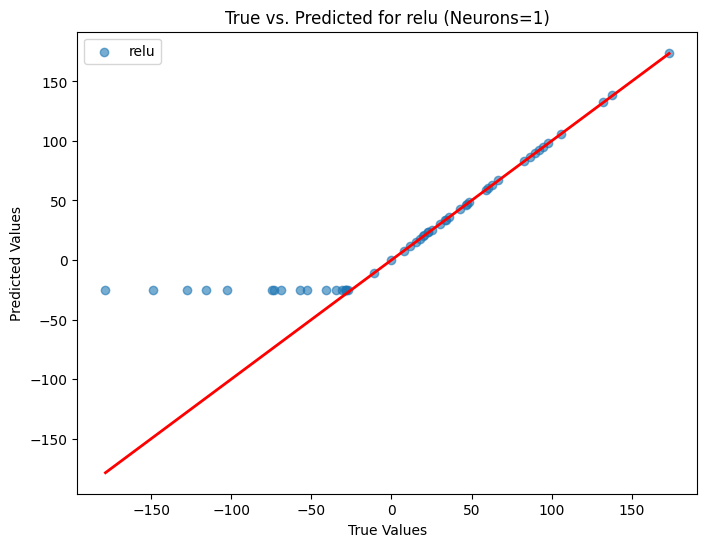

Training with 2 hidden neurons using relu activation
    Epoch 0, Train Loss: 5702.6704
    Epoch 100, Train Loss: 3566.7337
    Epoch 200, Train Loss: 192.8338
    Epoch 300, Train Loss: 4.7437
    Epoch 400, Train Loss: 4.6875
    Epoch 500, Train Loss: 4.6805
    Epoch 600, Train Loss: 4.6795
    Epoch 700, Train Loss: 4.6794
    Epoch 800, Train Loss: 4.6794
    Epoch 900, Train Loss: 4.6794


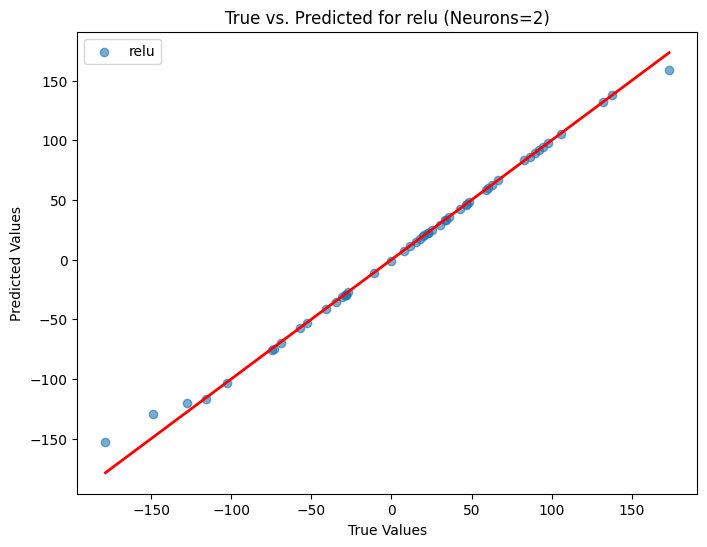

Training with 3 hidden neurons using relu activation
    Epoch 0, Train Loss: 5702.6675
    Epoch 100, Train Loss: 2731.7059
    Epoch 200, Train Loss: 110.8428
    Epoch 300, Train Loss: 8.4101
    Epoch 400, Train Loss: 8.2430
    Epoch 500, Train Loss: 8.1822
    Epoch 600, Train Loss: 8.1310
    Epoch 700, Train Loss: 8.0878
    Epoch 800, Train Loss: 8.0513
    Epoch 900, Train Loss: 8.0205


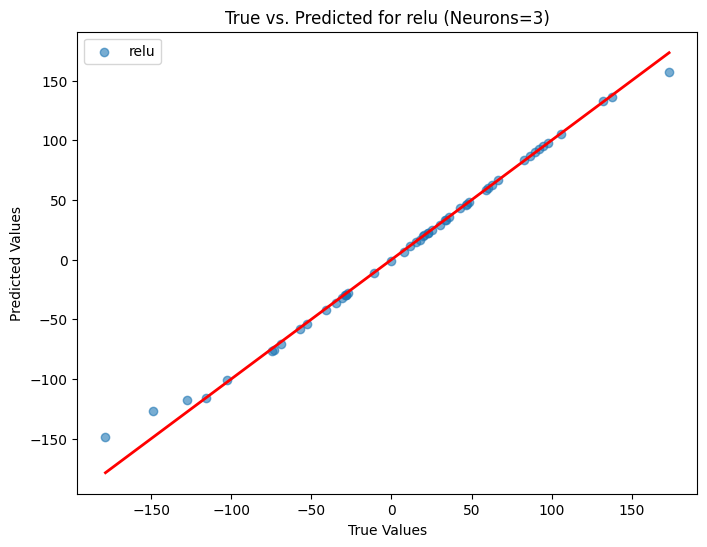

Training with 4 hidden neurons using relu activation
    Epoch 0, Train Loss: 5702.6718
    Epoch 100, Train Loss: 2673.7087
    Epoch 200, Train Loss: 112.6048
    Epoch 300, Train Loss: 7.4417
    Epoch 400, Train Loss: 7.4107
    Epoch 500, Train Loss: 7.3847
    Epoch 600, Train Loss: 7.3628
    Epoch 700, Train Loss: 7.3443
    Epoch 800, Train Loss: 7.3287
    Epoch 900, Train Loss: 7.3155


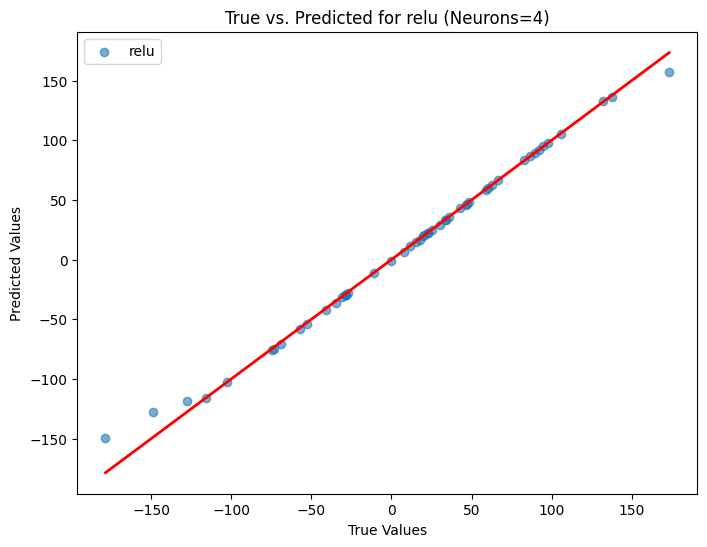

Training with 5 hidden neurons using relu activation
    Epoch 0, Train Loss: 5702.6900
    Epoch 100, Train Loss: 1742.2376
    Epoch 200, Train Loss: 111.7285
    Epoch 300, Train Loss: 11.0813
    Epoch 400, Train Loss: 10.4650
    Epoch 500, Train Loss: 10.3972
    Epoch 600, Train Loss: 10.3545
    Epoch 700, Train Loss: 10.3154
    Epoch 800, Train Loss: 10.2802
    Epoch 900, Train Loss: 10.2479


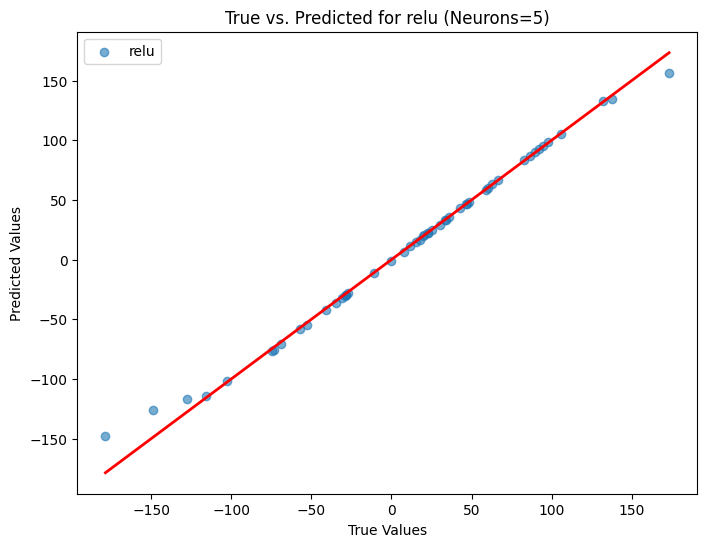

Training with 6 hidden neurons using relu activation
    Epoch 0, Train Loss: 5702.6672
    Epoch 100, Train Loss: 882.2315
    Epoch 200, Train Loss: 9.1608
    Epoch 300, Train Loss: 9.2191
    Epoch 400, Train Loss: 9.2271
    Epoch 500, Train Loss: 9.2281
    Epoch 600, Train Loss: 9.2283
    Epoch 700, Train Loss: 9.2283
    Epoch 800, Train Loss: 9.2283
    Epoch 900, Train Loss: 9.2283


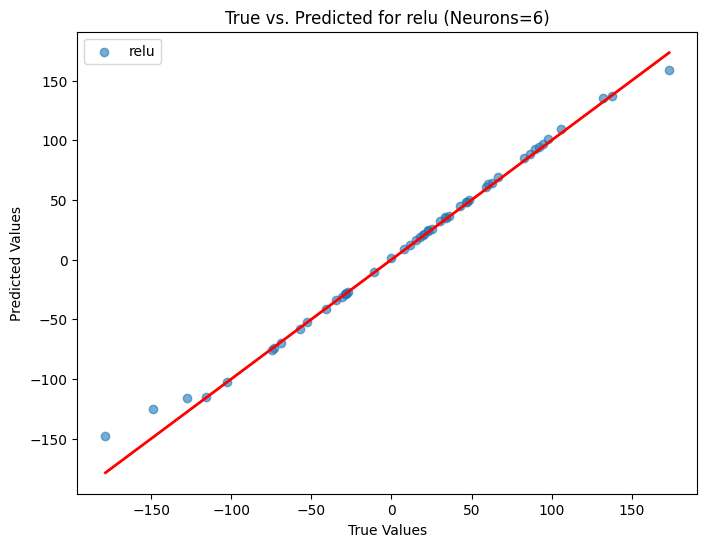

Training with 7 hidden neurons using relu activation
    Epoch 0, Train Loss: 5702.6932
    Epoch 100, Train Loss: 824.4244
    Epoch 200, Train Loss: 8.8792
    Epoch 300, Train Loss: 8.8056
    Epoch 400, Train Loss: 8.7964
    Epoch 500, Train Loss: 8.7954
    Epoch 600, Train Loss: 8.7954
    Epoch 700, Train Loss: 8.7954
    Epoch 800, Train Loss: 8.7955
    Epoch 900, Train Loss: 8.7955


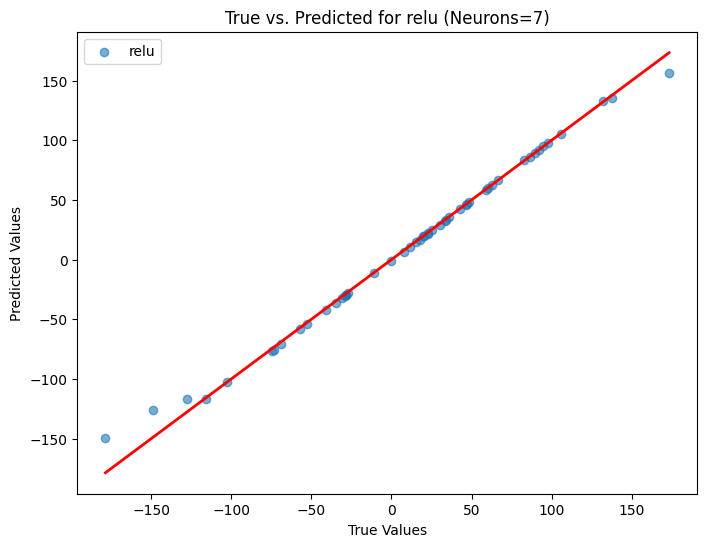

Training with 8 hidden neurons using relu activation
    Epoch 0, Train Loss: 5702.6653
    Epoch 100, Train Loss: 356.7381
    Epoch 200, Train Loss: 14.6702
    Epoch 300, Train Loss: 13.8701
    Epoch 400, Train Loss: 13.7427
    Epoch 500, Train Loss: 13.6823
    Epoch 600, Train Loss: 13.6161
    Epoch 700, Train Loss: 13.5648
    Epoch 800, Train Loss: 13.5249
    Epoch 900, Train Loss: 13.4937


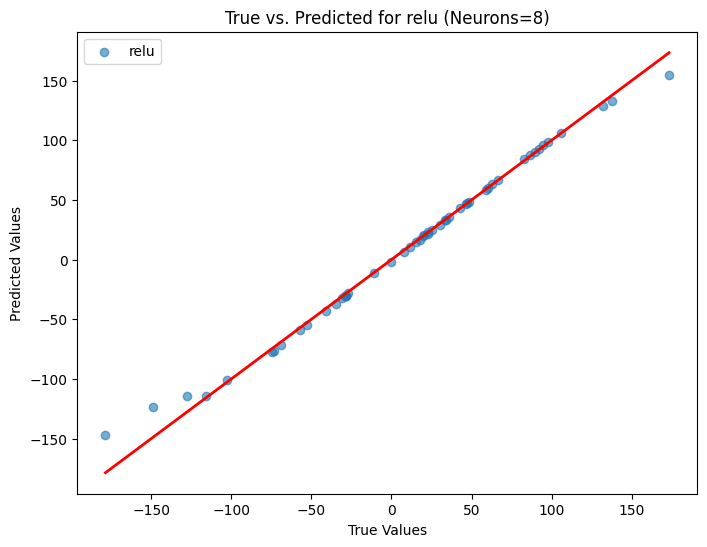

Training with 9 hidden neurons using relu activation
    Epoch 0, Train Loss: 5702.6903
    Epoch 100, Train Loss: 490.3134
    Epoch 200, Train Loss: 13.9115
    Epoch 300, Train Loss: 13.6331
    Epoch 400, Train Loss: 13.5292
    Epoch 500, Train Loss: 13.4297
    Epoch 600, Train Loss: 13.3343
    Epoch 700, Train Loss: 13.2427
    Epoch 800, Train Loss: 13.1535
    Epoch 900, Train Loss: 13.0681


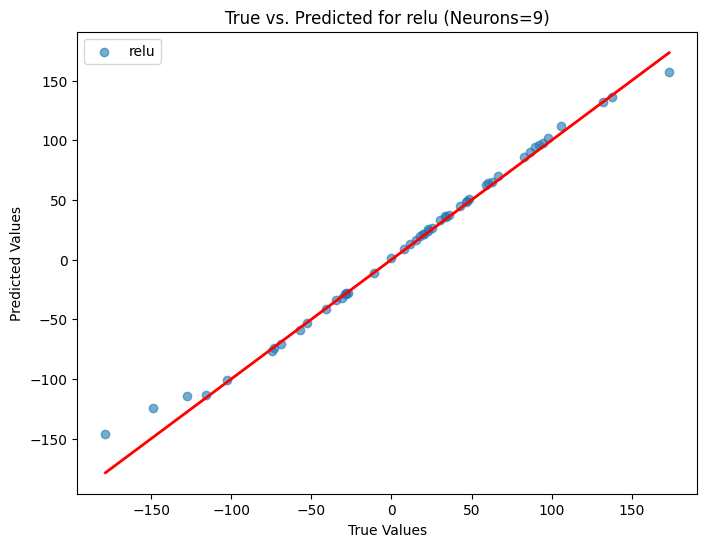

Training with 10 hidden neurons using relu activation
    Epoch 0, Train Loss: 5702.6951
    Epoch 100, Train Loss: 336.3429
    Epoch 200, Train Loss: 13.7028
    Epoch 300, Train Loss: 12.7768
    Epoch 400, Train Loss: 12.7589
    Epoch 500, Train Loss: 12.7191
    Epoch 600, Train Loss: 12.6914
    Epoch 700, Train Loss: 12.6706
    Epoch 800, Train Loss: 12.6547
    Epoch 900, Train Loss: 12.6426


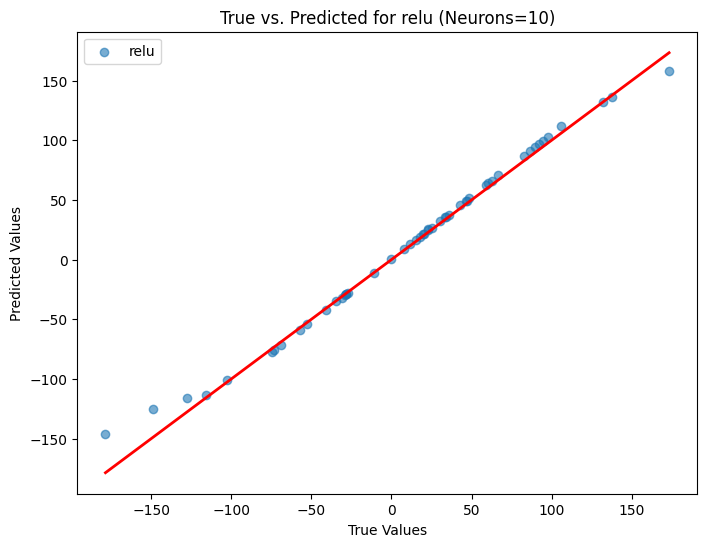

Final Losses:
Hidden Neurons: 1, Final Loss: 1156.8909
Hidden Neurons: 2, Final Loss: 4.7067
Hidden Neurons: 3, Final Loss: 7.7932
Hidden Neurons: 4, Final Loss: 7.1669
Hidden Neurons: 5, Final Loss: 9.9513
Hidden Neurons: 6, Final Loss: 9.2542
Hidden Neurons: 7, Final Loss: 8.8357
Hidden Neurons: 8, Final Loss: 13.1097
Hidden Neurons: 9, Final Loss: 12.9779
Hidden Neurons: 10, Final Loss: 12.9529


In [25]:
# Example usage
hidden_sizes = list(range(1, 11))  # Testing 1-10 neurons
learning_rate = 0.01  # Adjust as needed
num_epochs = 1000  # Adjust as needed
activation_name = "relu"  # Choose from "sigmoid", "relu", "tanh"

final_losses = train_network(X_train, Y_train, X_test, Y_test, hidden_sizes, learning_rate, num_epochs, activation_name)

print("Final Losses:")
for hidden_size, loss in final_losses.items():
    print(f"Hidden Neurons: {hidden_size}, Final Loss: {loss:.4f}")

Tanh

Training with 1 hidden neurons using tanh activation
    Epoch 0, Train Loss: 5702.6680
    Epoch 100, Train Loss: 5318.4323
    Epoch 200, Train Loss: 4944.4866
    Epoch 300, Train Loss: 4603.7640
    Epoch 400, Train Loss: 4287.2638
    Epoch 500, Train Loss: 3987.8690
    Epoch 600, Train Loss: 3704.4161
    Epoch 700, Train Loss: 3440.7923
    Epoch 800, Train Loss: 3195.1294
    Epoch 900, Train Loss: 2967.9338


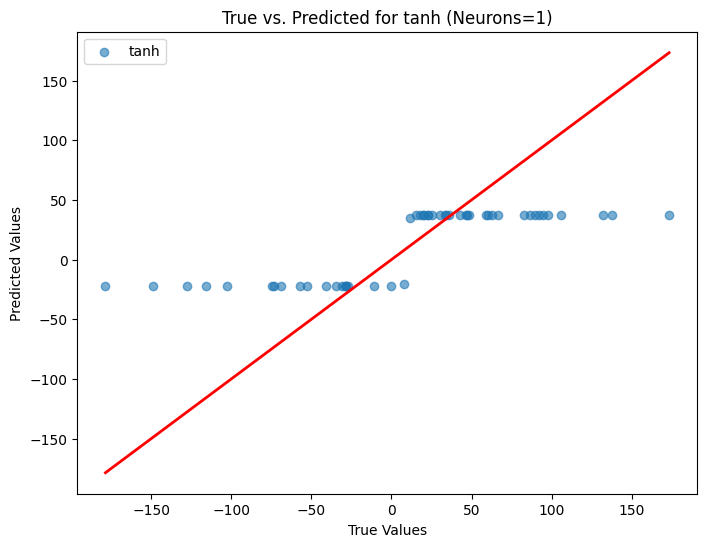

Training with 2 hidden neurons using tanh activation
    Epoch 0, Train Loss: 5702.6566
    Epoch 100, Train Loss: 4980.7990
    Epoch 200, Train Loss: 4298.2307
    Epoch 300, Train Loss: 3703.3241
    Epoch 400, Train Loss: 3174.1696
    Epoch 500, Train Loss: 2709.4279
    Epoch 600, Train Loss: 2307.4445
    Epoch 700, Train Loss: 1964.7740
    Epoch 800, Train Loss: 1681.3981
    Epoch 900, Train Loss: 1458.4460


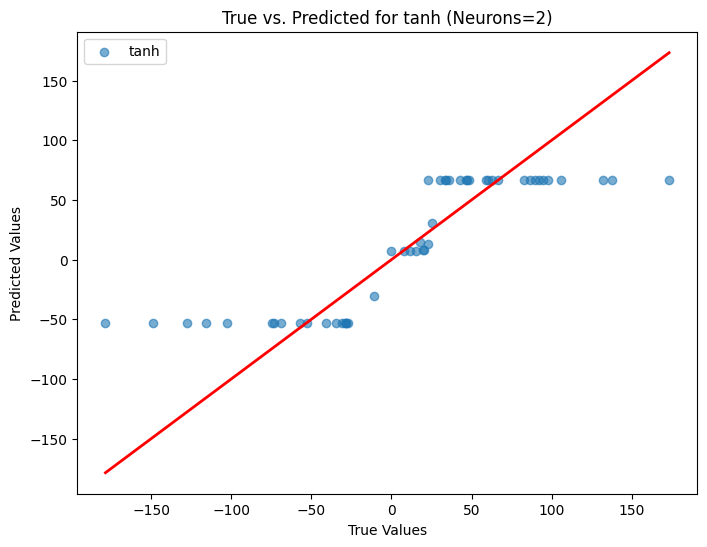

Training with 3 hidden neurons using tanh activation
    Epoch 0, Train Loss: 5702.6591
    Epoch 100, Train Loss: 4652.4750
    Epoch 200, Train Loss: 3711.4646
    Epoch 300, Train Loss: 2951.5887
    Epoch 400, Train Loss: 2304.3792
    Epoch 500, Train Loss: 1789.6544
    Epoch 600, Train Loss: 1382.4076
    Epoch 700, Train Loss: 1098.3568
    Epoch 800, Train Loss: 899.1092
    Epoch 900, Train Loss: 782.1666


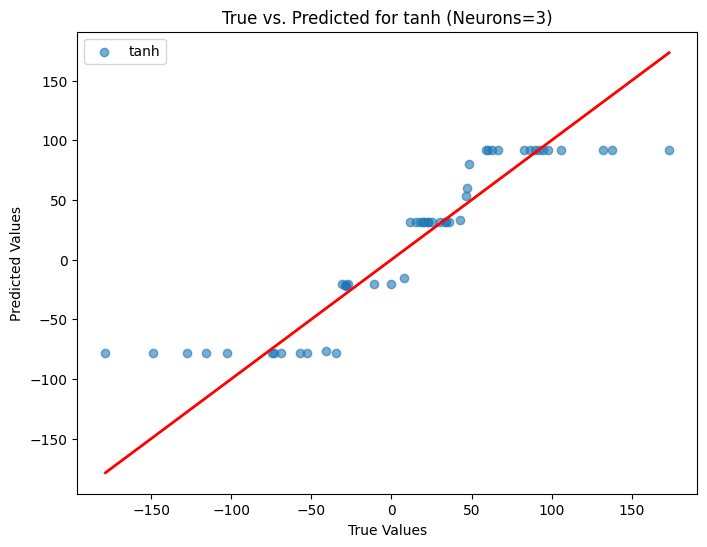

Training with 4 hidden neurons using tanh activation
    Epoch 0, Train Loss: 5702.6615
    Epoch 100, Train Loss: 4343.1843
    Epoch 200, Train Loss: 3193.1090
    Epoch 300, Train Loss: 2316.3571
    Epoch 400, Train Loss: 1647.8323
    Epoch 500, Train Loss: 1169.3859
    Epoch 600, Train Loss: 882.3932
    Epoch 700, Train Loss: 761.2399
    Epoch 800, Train Loss: 694.2093
    Epoch 900, Train Loss: 655.7149


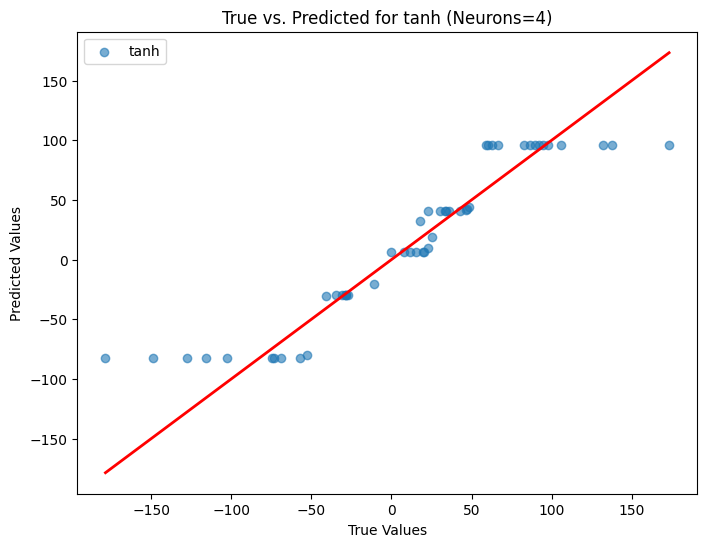

Training with 5 hidden neurons using tanh activation
    Epoch 0, Train Loss: 5702.6538
    Epoch 100, Train Loss: 4062.6249
    Epoch 200, Train Loss: 2748.5328
    Epoch 300, Train Loss: 1800.0862
    Epoch 400, Train Loss: 1169.6824
    Epoch 500, Train Loss: 803.0831
    Epoch 600, Train Loss: 663.6770
    Epoch 700, Train Loss: 582.7127
    Epoch 800, Train Loss: 552.2943
    Epoch 900, Train Loss: 549.7223


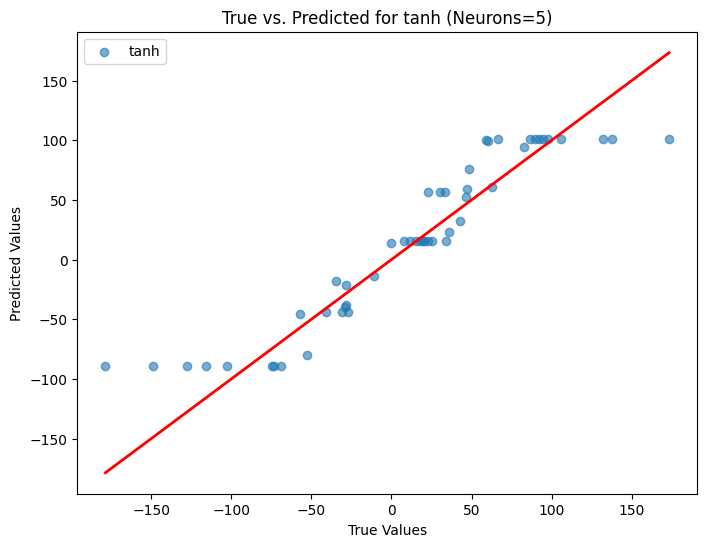

Training with 6 hidden neurons using tanh activation
    Epoch 0, Train Loss: 5702.6412
    Epoch 100, Train Loss: 3761.2918
    Epoch 200, Train Loss: 2345.1464
    Epoch 300, Train Loss: 1407.1893
    Epoch 400, Train Loss: 867.5859
    Epoch 500, Train Loss: 686.9611
    Epoch 600, Train Loss: 568.2065
    Epoch 700, Train Loss: 439.1678
    Epoch 800, Train Loss: 344.4908
    Epoch 900, Train Loss: 279.8473


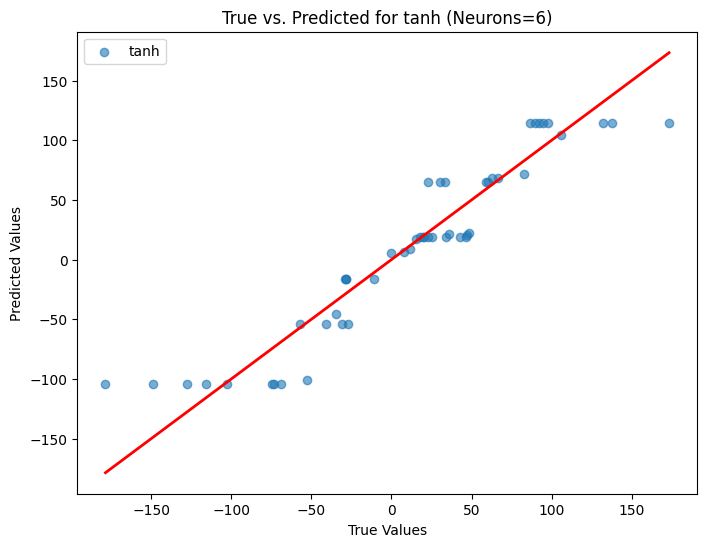

Training with 7 hidden neurons using tanh activation
    Epoch 0, Train Loss: 5702.5823
    Epoch 100, Train Loss: 3486.1542
    Epoch 200, Train Loss: 1999.3011
    Epoch 300, Train Loss: 1089.0068
    Epoch 400, Train Loss: 699.7374
    Epoch 500, Train Loss: 554.5635
    Epoch 600, Train Loss: 429.0353
    Epoch 700, Train Loss: 379.0392
    Epoch 800, Train Loss: 329.7843
    Epoch 900, Train Loss: 278.0015


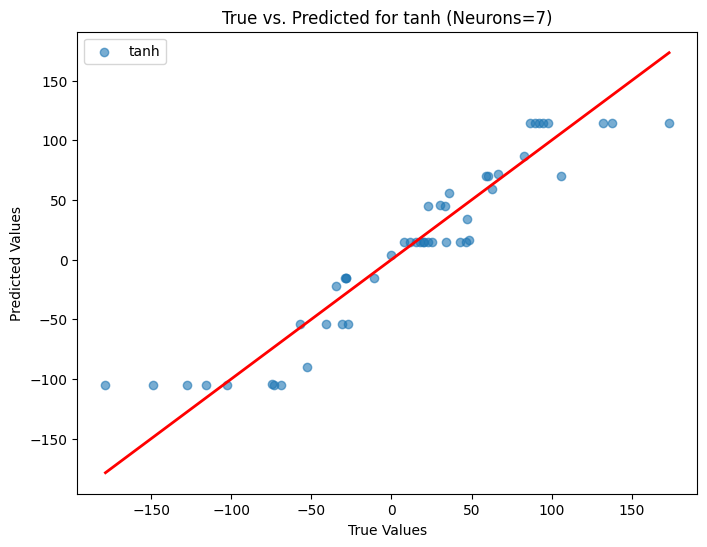

Training with 8 hidden neurons using tanh activation
    Epoch 0, Train Loss: 5702.6465
    Epoch 100, Train Loss: 3262.9101
    Epoch 200, Train Loss: 1693.1880
    Epoch 300, Train Loss: 878.8284
    Epoch 400, Train Loss: 646.7852
    Epoch 500, Train Loss: 525.2756
    Epoch 600, Train Loss: 377.2890
    Epoch 700, Train Loss: 285.4823
    Epoch 800, Train Loss: 261.8638
    Epoch 900, Train Loss: 253.6536


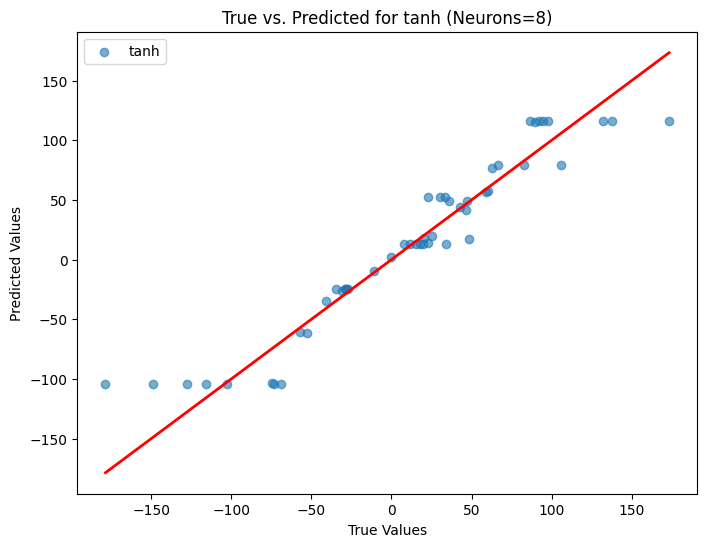

Training with 9 hidden neurons using tanh activation
    Epoch 0, Train Loss: 5702.7669
    Epoch 100, Train Loss: 3012.3255
    Epoch 200, Train Loss: 1466.4339
    Epoch 300, Train Loss: 748.7882
    Epoch 400, Train Loss: 595.9972
    Epoch 500, Train Loss: 444.2819
    Epoch 600, Train Loss: 390.0916
    Epoch 700, Train Loss: 338.4283
    Epoch 800, Train Loss: 307.5947
    Epoch 900, Train Loss: 275.2956


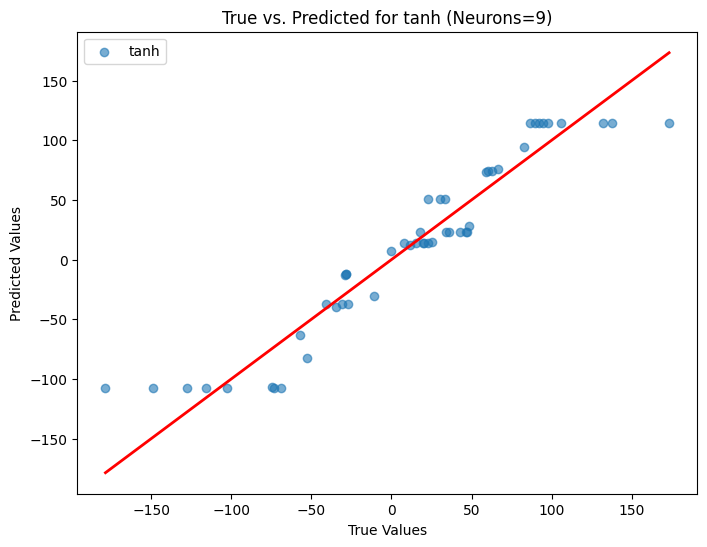

Training with 10 hidden neurons using tanh activation
    Epoch 0, Train Loss: 5702.7278
    Epoch 100, Train Loss: 2781.4711
    Epoch 200, Train Loss: 1256.4040
    Epoch 300, Train Loss: 705.1742
    Epoch 400, Train Loss: 529.5224
    Epoch 500, Train Loss: 410.0669
    Epoch 600, Train Loss: 347.1872
    Epoch 700, Train Loss: 299.3966
    Epoch 800, Train Loss: 248.8073
    Epoch 900, Train Loss: 235.9929


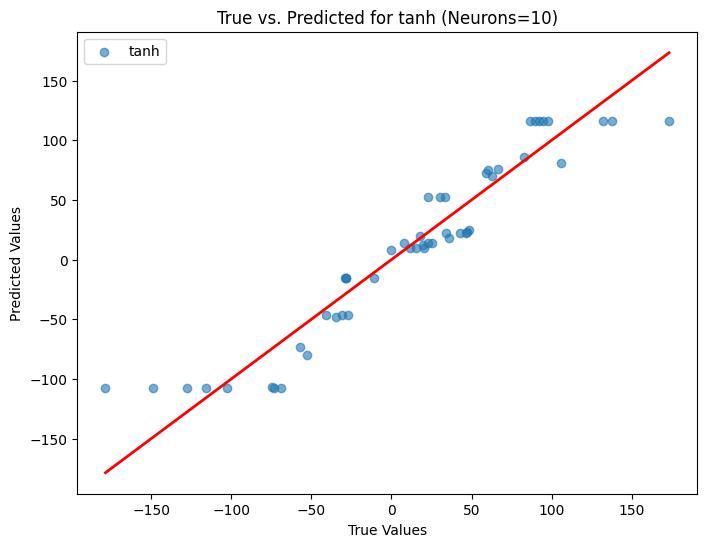

Final Losses:
Hidden Neurons: 1, Final Loss: 2760.8956
Hidden Neurons: 2, Final Loss: 1296.9766
Hidden Neurons: 3, Final Loss: 745.0120
Hidden Neurons: 4, Final Loss: 623.0490
Hidden Neurons: 5, Final Loss: 526.5874
Hidden Neurons: 6, Final Loss: 259.5269
Hidden Neurons: 7, Final Loss: 259.8619
Hidden Neurons: 8, Final Loss: 245.0092
Hidden Neurons: 9, Final Loss: 244.1787
Hidden Neurons: 10, Final Loss: 230.5293


In [26]:
# Example usage
hidden_sizes = list(range(1, 11))  # Testing 1-10 neurons
learning_rate = 0.01  # Adjust as needed
num_epochs = 1000  # Adjust as needed
activation_name = "tanh"  # Choose from "sigmoid", "relu", "tanh"

final_losses = train_network(X_train, Y_train, X_test, Y_test, hidden_sizes, learning_rate, num_epochs, activation_name)

print("Final Losses:")
for hidden_size, loss in final_losses.items():
    print(f"Hidden Neurons: {hidden_size}, Final Loss: {loss:.4f}")